In [32]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')
dow = pdr.get_data_yahoo('^DJI','2000-01-04')
nasdaq=pdr.get_data_yahoo('^NDX','2000-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


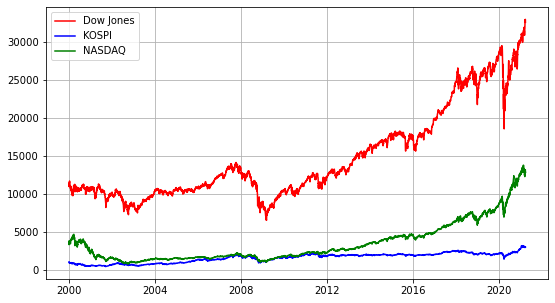

In [14]:
#For absolute value
plt.figure(figsize=(9,5))
plt.plot(dow.index,dow.Close,'r',label="Dow Jones")
plt.plot(kospi.index,kospi.Close,'b',label="KOSPI")
plt.plot(nasdaq.index,nasdaq.Close,'g',label="NASDAQ")
plt.grid(True)
plt.legend(loc='best')
plt.show()

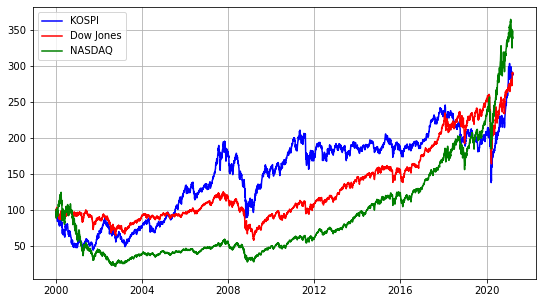

In [12]:
#For relative value
kospi_p=kospi['Close']*100/kospi['Close'][0]
dow_p=dow['Close']*100/dow['Close'][0]
nasdaq_p=nasdaq['Close']*100/nasdaq['Close'][0]
plt.figure(figsize=(9,5))
plt.plot(kospi.index,kospi_p,'b',label='KOSPI')
plt.plot(dow.index,dow_p,'r',label='Dow Jones')
plt.plot(nasdaq.index,nasdaq_p,'g',label='NASDAQ')

plt.grid(True)
plt.legend(loc='best')
plt.show()

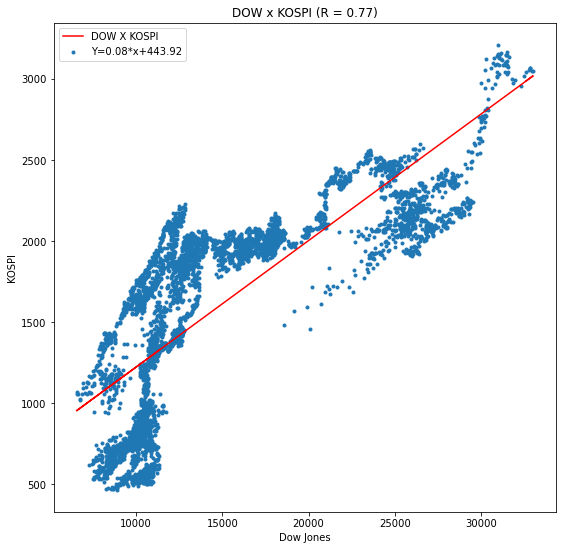

In [41]:
#Scatter plot 
df=pd.DataFrame({'DOW':dow['Close'],'KOSPI':kospi['Close'],'NASDAQ':nasdaq['Close']})
df = df.fillna(method='bfill')    #REMOVE NONE   # bfill = BACKWARD FILL   

regr=stats.linregress(df.DOW,df.KOSPI)
regr_line=f'Y={regr.slope:.2f}*x+{regr.intercept:.2f}'


plt.figure(figsize=(9,9))
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.scatter(df['DOW'],df['KOSPI'],marker='.')
plt.plot(df.DOW,regr.slope*df.DOW+regr.intercept,'r')
plt.legend(['DOW X KOSPI',regr_line])
plt.xlabel('Dow Jones')
plt.ylabel('KOSPI')

plt.show()

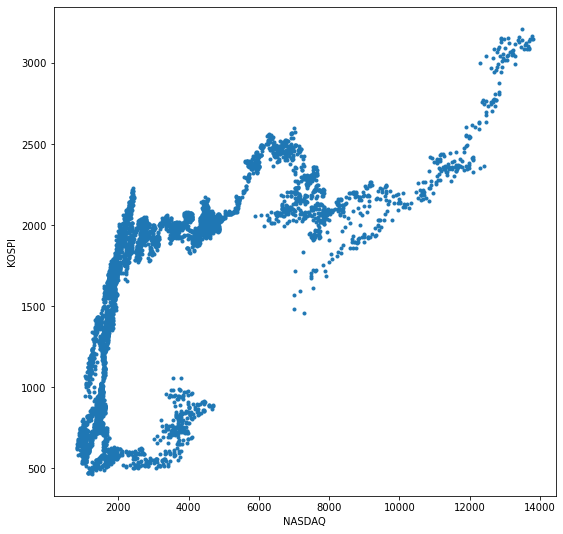

In [28]:
plt.figure(figsize=(9,9))
plt.scatter(df['NASDAQ'],df['KOSPI'],marker='.')
plt.xlabel('NASDAQ')
plt.ylabel('KOSPI')
plt.show()